In [ ]:
#Mini Project: Chocolate Dataset from Kaggle 
#https://www.kaggle.com/rtatman/chocolate-bar-ratings

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
df = pd.read_csv("datasets_chocolate.csv")

In [38]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [39]:
# Change Column Names:
df.columns = ['Company', 'Origin', 'REF', 'Review_Date','Cocoa_Percent','Company_Location', 'Rating', 'Bean_Type', 'Bean_Origin']

In [40]:
df.head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1795 non-null   object 
 1   Origin            1795 non-null   object 
 2   REF               1795 non-null   int64  
 3   Review_Date       1795 non-null   int64  
 4   Cocoa_Percent     1795 non-null   object 
 5   Company_Location  1795 non-null   object 
 6   Rating            1795 non-null   float64
 7   Bean_Type         1794 non-null   object 
 8   Bean_Origin       1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [42]:
df.isna().sum()

Company             0
Origin              0
REF                 0
Review_Date         0
Cocoa_Percent       0
Company_Location    0
Rating              0
Bean_Type           1
Bean_Origin         1
dtype: int64

In [43]:
# two rows have missing data so drop the rows with missing data:
data = df.dropna()

In [44]:
# check to make sure the rows were dropped:
data.isna().sum()

Company             0
Origin              0
REF                 0
Review_Date         0
Cocoa_Percent       0
Company_Location    0
Rating              0
Bean_Type           0
Bean_Origin         0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1793 non-null   object 
 1   Origin            1793 non-null   object 
 2   REF               1793 non-null   int64  
 3   Review_Date       1793 non-null   int64  
 4   Cocoa_Percent     1793 non-null   object 
 5   Company_Location  1793 non-null   object 
 6   Rating            1793 non-null   float64
 7   Bean_Type         1793 non-null   object 
 8   Bean_Origin       1793 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 140.1+ KB


In [46]:
# 1. How many tuples are there in the dataset?
#1795 rows and 9 columns of data in the original dataset

In [ ]:
# 2. The count of the names of unique company names from the attributes

In [47]:
data['Company'].value_counts()

Soma                                 46
Bonnat                               27
Fresco                               26
Pralus                               25
A. Morin                             23
                                     ..
Love Bar                              1
Chocolate Conspiracy                  1
Confluence                            1
Vintage Plantations                   1
Cacaosuyo (Theobroma Inversiones)     1
Name: Company, Length: 416, dtype: int64

In [48]:
len(data['Company'].unique().tolist())

416

In [49]:
df['Company'].nunique()

416

In [ ]:
#3. The count of reviews in 2013

In [50]:
(data['Review_Date'] == 2013).sum()


184

In [ ]:
#4. The count of missing values

In [51]:
list(data['Bean_Type'])[0:10]

['\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 '\xa0',
 'Criollo',
 '\xa0',
 'Criollo',
 'Criollo',
 '\xa0']

In [52]:
data['Bean_Type'].value_counts()

                            887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
EET                           3
Beniano                       3
Matina                        3
Nacional (Arriba)             3
Nacional                      2
Amazon mix                    2
Amazon, ICS                   2
Criollo, Forastero            2
Trinitario (85% Criollo)      2
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Forastero (Catongo)           2
Criollo (Amarru)              2
Forastero(Arriba, CCN)        1
Blend-Forastero,Criollo       1
Criollo, +                    1
Trinitario, Nacional          1
Amazon                        1
Criollo (Ocumare 77)          1
Criollo 

In [ ]:
# The above shows 887 rows of missing data for bean_type

In [ ]:
#5. Histogram of Ratings

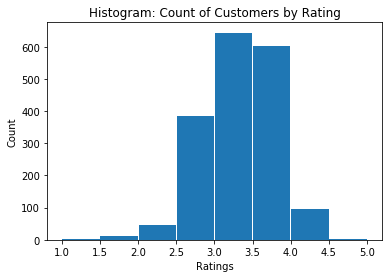

In [92]:
x= data['Rating']
plt.hist(x, bins =8, rwidth = 0.98)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title("Histogram: Count of Customers by Rating")
plt.show()	

Text(0.5, 1.0, 'Count of Customers by Rating')

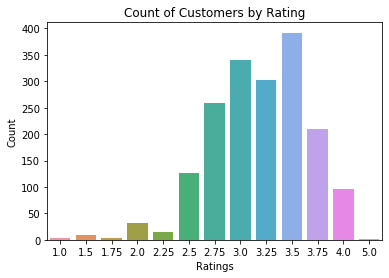

In [93]:
import seaborn as sns
sns.countplot (x= 'Rating', data = data)
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title ("Count of Customers by Rating")

In [ ]:
# 6. An output plot of the scatter plot between the cocoa percent values against the rating values

In [80]:
data['Cocoa_Percent'] = data['Cocoa_Percent'].str.replace('%', '')

In [81]:
data['Cocoa_Percent'] = data['Cocoa_Percent'].astype(float)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1793 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1793 non-null   object 
 1   Origin            1793 non-null   object 
 2   REF               1793 non-null   int64  
 3   Review_Date       1793 non-null   int64  
 4   Cocoa_Percent     1793 non-null   float64
 5   Company_Location  1793 non-null   object 
 6   Rating            1793 non-null   float64
 7   Bean_Type         1793 non-null   object 
 8   Bean_Origin       1793 non-null   object 
 9   Cocoa_percent     1793 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.1+ KB


In [83]:
y = data['Cocoa_Percent']

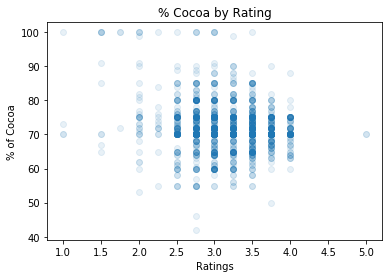

In [94]:
plt.scatter(x, y, alpha = 0.1)
plt.xlabel('Ratings')
plt.ylabel('% of Cocoa')
plt.title ('% Cocoa by Rating')
plt.show()


Cocoa in about  the 70% range seems to have a slighlty higher rating

In [ ]:
#7. Normalize the ratings column

In [95]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['Rating'])
data['Rating'] = encoder.fit_transform(data['Rating'])

In [96]:
data.head()

,Company,Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin,Cocoa_percent
0,A. Morin,Agua Grande,1876,2016,63.0,France,10,,Sao Tome,63
1,A. Morin,Kpime,1676,2015,70.0,France,6,,Togo,70
2,A. Morin,Atsane,1676,2015,70.0,France,7,,Togo,70
3,A. Morin,Akata,1680,2015,70.0,France,9,,Togo,70
4,A. Morin,Quilla,1704,2015,70.0,France,9,,Peru,70


In [99]:
x2= data['Rating']

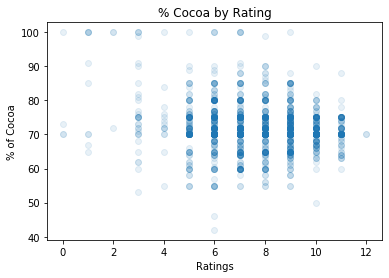

In [100]:
plt.scatter(x2, y, alpha = 0.1)
plt.xlabel('Ratings')
plt.ylabel('% of Cocoa')
plt.title ('% Cocoa by Rating')
plt.show()

In [102]:
data['Rating'].unique()

array([10,  6,  7,  9, 11,  8,  5, 12,  2,  1,  4,  3,  0], dtype=int64)